In [1]:
# Detecting Malaria Using Convolution Neural Network

In [9]:
## About dataset : The dataset contains 2 folders - Infected - Uninfected'
## And a total of 27800 images

In [10]:
###This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 


In [12]:
## Using the various library in the dataset

In [26]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [17]:
my_data_dir = 'C://Users//ASUS/Downloads/cell_images'

In [18]:
os.listdir(my_data_dir) 

['test', 'train']

In [19]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [20]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [21]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [22]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [69]:
### Entire file path to a single image
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [27]:
para_img= imread(para_cell)

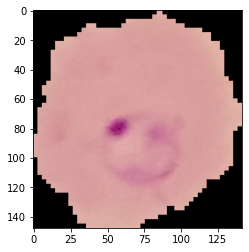

In [28]:
plt.imshow(para_img)

In [29]:
para_img.shape

(148, 142, 3)

In [30]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]

In [31]:
unifected_cell = imread(unifected_cell_path)

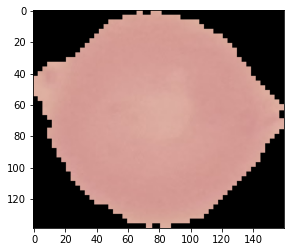

In [32]:
plt.imshow(unifected_cell)

In [33]:
### Now checking the images in our both parasitized and uninfected folder

In [34]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [35]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [36]:
### Now finding the average dimension of these images

In [37]:
unifected_cell.shape

(139, 160, 3)

In [38]:
para_img.shape

(148, 142, 3)

In [39]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [40]:
np.mean(dim1)

130.92538461538462

In [41]:
np.mean(dim2)

130.75

In [42]:
image_shape = (130,130,3)

In [45]:
## Preparing the Data for the model

#### There is too much data for us to read all at once in memory. We will use built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

####Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us.

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [48]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

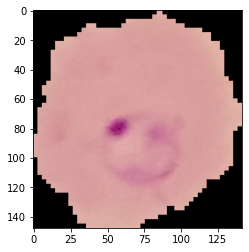

In [49]:
plt.imshow(para_img)

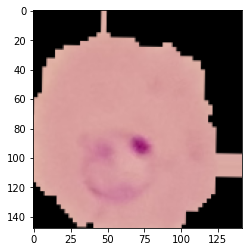

In [50]:
plt.imshow(image_gen.random_transform(para_img))

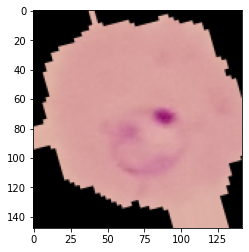

In [51]:
plt.imshow(image_gen.random_transform(para_img))

In [52]:
### Generating many manipulated images from a directory


####In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.


In [53]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [54]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [55]:
# Creating the Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [57]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer,is binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [60]:
## Early Stopping

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [63]:
batch_size = 16

In [64]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [65]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [66]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [68]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5872\675747789.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
1560/1560 [==============================] - 562s 360ms/step - loss: 0.1485 - accuracy: 0.9518 - val_loss: 0.1589 - val_accuracy: 0.9477
Epoch 2/20
1560/1560 [==============================] - 515s 330ms/step - loss: 0.1512 - accuracy: 0.9511 - val_loss: 0.1519 - val_accuracy: 0.9500
Epoch 3/20
1560/1560 [==============================] - 556s 357ms/step - loss: 0.1488 - accuracy: 0.9533 - val_loss: 0.1447 - val_accuracy: 0.9512
Epoch 4/20
1560/1560 [==============================] - 582s 373ms/step - loss: 0.1525 - accuracy: 0.9508 - val_loss: 0.1437 - val_accuracy: 0.9542
Epoch 5/20
1560/1560 [==============================] - 535s 343ms/step - loss: 0.1511 - accuracy: 0.9526 - val_loss: 0.1397 - val_accuracy: 0.9515
Epoch 6/20
1560/1560 [==============================] - 548s 351ms/step - loss: 0.1467 - accuracy: 0.9533 - val_loss: 0.1404 - val_accuracy: 0.9496
Epoch 7/20
1560/1560 [==============================] - 552s 354ms/step - loss: 0.1478 - accuracy: 0.9525 - val_

In [74]:
model.history.history

{'loss': [0.1485128551721573,
  0.15122386813163757,
  0.14876297116279602,
  0.1525476723909378,
  0.15110713243484497,
  0.14669381082057953,
  0.14784103631973267],
 'accuracy': [0.9517589807510376,
  0.9511178731918335,
  0.9533215761184692,
  0.9508374333381653,
  0.952600359916687,
  0.9532815217971802,
  0.9525202512741089],
 'val_loss': [0.15894924104213715,
  0.15193809568881989,
  0.14467421174049377,
  0.14370082318782806,
  0.1396707147359848,
  0.14038772881031036,
  0.1439475119113922],
 'val_accuracy': [0.947692334651947,
  0.949999988079071,
  0.9511538743972778,
  0.954230785369873,
  0.9515384435653687,
  0.9496153593063354,
  0.9496153593063354]}

In [75]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

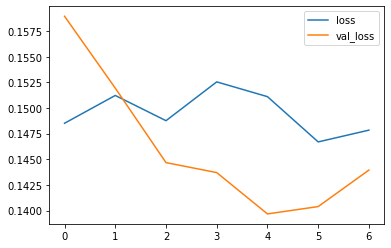

In [80]:
losses[['loss','val_loss']].plot()

In [81]:
model.metrics_names

['loss', 'accuracy']

In [82]:
model.evaluate_generator(test_image_gen)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5872\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.14454308152198792, 0.9480769038200378]

In [83]:
pred_probabilities = model.predict_generator(test_image_gen)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5872\3998936794.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred_probabilities = model.predict_generator(test_image_gen)


In [84]:
pred_probabilities

array([[5.3893011e-05],
       [7.9545134e-06],
       [9.9741155e-05],
       ...,
       [9.7888994e-01],
       [9.6941614e-01],
       [7.1617192e-01]], dtype=float32)

In [85]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [86]:
predictions = pred_probabilities > 0.5

In [87]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [90]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1214,   86],
       [  51, 1249]], dtype=int64)